# PRODUCT RECOMMENDATION (MILESTONE-3)
#### A product recommendation is fundamentally a filtering system that attempts to forecast and display the products that a user would be interested in purchasing.

### Dataset: Online Retail Transactional dataset
https://archive.ics.uci.edu/ml/datasets/Online+Retail

# Data Preprocessing

In [3]:
# Step-I Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import calendar


from numpy import dot
from numpy.linalg import norm 

In [4]:
#Step-II Retrieving the dataset

PR_data = pd.read_csv('Online Retail.csv')
PR_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
# Step-III - Apply Dataframe op (Reading and Understanding Dataset)

PR_data.shape

(49999, 8)

In [6]:
PR_data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [7]:
PR_data.tail(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
49997,540541,22169,FAMILY ALBUM WHITE PICTURE FRAME,2,01-09-2011 15:13,8.50,15799.0,United Kingdom
49998,540541,22170,PICTURE FRAME WOOD TRIPLE PORTRAIT,4,01-09-2011 15:13,6.75,15799.0,United Kingdom


In [8]:
PR_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
PR_data.info

<bound method DataFrame.info of       InvoiceNo StockCode                          Description  Quantity  \
0        536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1        536365     71053                  WHITE METAL LANTERN         6   
2        536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3        536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4        536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...         ...       ...                                  ...       ...   
49994    540541     22341           LOVE GARLAND PAINTED ZINC         12   
49995    540541     21332         MOROCCAN BEATEN METAL MIRROR         1   
49996    540541     20831                     GOLD PHOTO FRAME         6   
49997    540541     22169     FAMILY ALBUM WHITE PICTURE FRAME         2   
49998    540541     22170   PICTURE FRAME WOOD TRIPLE PORTRAIT         4   

            InvoiceDate  UnitPrice  CustomerID         

In [10]:
PR_data.describe()

,Quantity,UnitPrice,CustomerID
count,49999.000000,49999.000000,32118.000000
mean,8.293466,6.418330,15431.210536
std,55.529039,166.506492,1753.384914
min,-9360.000000,0.000000,12347.000000
25%,1.000000,1.250000,14057.000000
50%,2.000000,2.510000,15464.000000
75%,8.000000,4.250000,17059.000000
max,2880.000000,16888.020000,18283.000000


In [11]:
# Step-IV- Handle the Missing values

# Check for Null/missing values 
PR_data.isnull().sum()

InvoiceNo          0
StockCode          0
Description      142
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     17881
Country            0
dtype: int64

In [12]:
# Check number of unique values
PR_data.nunique()

InvoiceNo      2338
StockCode      2879
Description    2817
Quantity        214
InvoiceDate    2063
UnitPrice       314
CustomerID     1039
Country          24
dtype: int64

In [13]:
# Delete rows with null CustomerID
PR_data = PR_data.dropna(subset = ['CustomerID'])

In [14]:
# Check for Null/missing values 
PR_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
# Removing the price and quantity that are less than or equal to 0
PR_data = PR_data[(PR_data.Quantity > 0) & (PR_data.UnitPrice > 0)]

In [16]:
PR_data.describe()

,Quantity,UnitPrice,CustomerID
count,31233.000000,31233.000000,31233.000000
mean,12.211539,3.118601,15442.473153
std,44.041776,4.971753,1755.042815
min,1.000000,0.070000,12347.000000
25%,2.000000,1.250000,14078.000000
50%,4.000000,2.100000,15485.000000
75%,12.000000,3.750000,17062.000000
max,2880.000000,295.000000,18283.000000


In [17]:
PR_data.shape

(31233, 8)

In [18]:
PR_data.nunique()

InvoiceNo      1617
StockCode      2483
Description    2493
Quantity        109
InvoiceDate    1501
UnitPrice       136
CustomerID      973
Country          22
dtype: int64

In [19]:
PR_data.shape

(31233, 8)

In [20]:
# Step-V - Extraction of dependent and independent variables.
X=PR_data.iloc[:,2:96]
Y=PR_data.iloc[:,1]

In [21]:
X

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
49994,LOVE GARLAND PAINTED ZINC,12,01-09-2011 15:13,1.65,15799.0,United Kingdom
49995,MOROCCAN BEATEN METAL MIRROR,1,01-09-2011 15:13,12.75,15799.0,United Kingdom
49996,GOLD PHOTO FRAME,6,01-09-2011 15:13,2.10,15799.0,United Kingdom
49997,FAMILY ALBUM WHITE PICTURE FRAME,2,01-09-2011 15:13,8.50,15799.0,United Kingdom


In [22]:
Y

0        85123A
1         71053
2        84406B
3        84029G
4        84029E
          ...  
49994     22341
49995     21332
49996     20831
49997     22169
49998     22170
Name: StockCode, Length: 31233, dtype: object

In [23]:
# Step-VI- Handle the catagorical data
X = pd.get_dummies(X, columns=["Description"])

In [24]:
X

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_ 4 PURPLE FLOCK DINNER CANDLES,Description_ OVAL WALL MIRROR DIAMANTE,Description_ SET 2 TEA TOWELS I LOVE LONDON,Description_10 COLOUR SPACEBOY PEN,Description_12 COLOURED PARTY BALLOONS,...,Description_YOU'RE CONFUSING ME METAL SIGN,Description_YULETIDE IMAGES GIFT WRAP SET,Description_YULETIDE IMAGES S/6 PAPER BOXES,Description_ZINC FINISH 15CM PLANTER POTS,Description_ZINC HEART LATTICE CHARGER LARGE,Description_ZINC HEART LATTICE CHARGER SMALL,Description_ZINC HEART LATTICE T-LIGHT HOLDER,Description_ZINC METAL HEART DECORATION,Description_ZINC TOP 2 DOOR WOODEN SHELF,Description_ZINC WILLIE WINKIE CANDLE STICK
0,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,12,01-09-2011 15:13,1.65,15799.0,United Kingdom,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49995,1,01-09-2011 15:13,12.75,15799.0,United Kingdom,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,6,01-09-2011 15:13,2.10,15799.0,United Kingdom,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,2,01-09-2011 15:13,8.50,15799.0,United Kingdom,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# drop redundant columns
cols = ['CustomerID', 'InvoiceDate', 'Country']
X.drop(columns = cols, inplace = True)

In [26]:
# Splitting the dataset into train (80%) and test (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=0)

In [27]:
X_train.shape

(24986, 2495)

In [28]:
X_test.shape

(6247, 2495)

In [29]:
Y_train.shape

(24986,)

In [30]:
Y_test.shape

(6247,)

In [1]:
def normalize(data):
    '''
    This function will normalize the input data to be between 0 and 1
    
    params:
        data (List) : The list of values you want to normalize
    
    returns:
        The input data normalized between 0 and 1
    '''
    min_val = min(data)
    if min_val < 0:
        data = [x + abs(min_val) for x in data]
    max_val = max(data)
    return [x/max_val for x in data]

In [32]:
# # normalize the Quantity and UnitPriice
# X_train['Quantity'] = normalize(X_train['Quantity'].values)
# X_train['UnitPrice'] = normalize(X_train['UnitPrice'].values)
# X_test['Quantity'] = normalize(X_test['Quantity'].values)
# X_test['UnitPrice'] = normalize(X_test['UnitPrice'].values)

In [33]:
# X_train

In [34]:
# X_test

In [35]:
# Feature scalling ----Standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.00692538 -0.28577885 -0.00894714 ... -0.03851007 -0.01095818
  -0.02098667]
 [-0.00692538 -0.48030332 -0.00894714 ... -0.03851007 -0.01095818
  -0.02098667]
 [-0.04994818 -0.28577885 -0.00894714 ... -0.03851007 -0.01095818
  -0.02098667]
 ...
 [-0.00692538 -0.19824283 -0.00894714 ... -0.03851007 -0.01095818
  -0.02098667]
 [ 1.28375837  5.75226092 -0.00894714 ... -0.03851007 -0.01095818
  -0.02098667]
 [ 2.83257888 -0.46668661 -0.00894714 ... -0.03851007 -0.01095818
  -0.02098667]]
[[-0.24355074 -0.44139843 -0.00894714 ... -0.03851007 -0.01095818
  -0.02098667]
 [-0.24355074  0.12272255 -0.00894714 ... -0.03851007 -0.01095818
  -0.02098667]
 [-0.24355074 -0.03289703 -0.00894714 ... -0.03851007 -0.01095818
  -0.02098667]
 ...
 [-0.04994818 -0.28577885 -0.00894714 ... -0.03851007 -0.01095818
  -0.02098667]
 [-0.24355074 -0.19824283 -0.00894714 ... -0.03851007 -0.01095818
  -0.02098667]
 [-0.24355074  2.69044565 -0.00894714 ... -0.03851007 -0.01095818
  -0.02098667]]


In [36]:
# # feature scalling ----Nomalization
# from sklearn.preprocessing import MinMaxScaler
# mmsc=MinMaxScaler()
# X_train=mmsc.fit_transform(X_train)
# X_test=mmsc.transform(X_test)

In [37]:
# X_train

array([[-0.00692538, -0.28577885, -0.00894714, ..., -0.03851007,
        -0.01095818, -0.02098667],
       [-0.00692538, -0.48030332, -0.00894714, ..., -0.03851007,
        -0.01095818, -0.02098667],
       [-0.04994818, -0.28577885, -0.00894714, ..., -0.03851007,
        -0.01095818, -0.02098667],
       ...,
       [-0.00692538, -0.19824283, -0.00894714, ..., -0.03851007,
        -0.01095818, -0.02098667],
       [ 1.28375837,  5.75226092, -0.00894714, ..., -0.03851007,
        -0.01095818, -0.02098667],
       [ 2.83257888, -0.46668661, -0.00894714, ..., -0.03851007,
        -0.01095818, -0.02098667]])

In [38]:
# X_test

array([[-0.24355074, -0.44139843, -0.00894714, ..., -0.03851007,
        -0.01095818, -0.02098667],
       [-0.24355074,  0.12272255, -0.00894714, ..., -0.03851007,
        -0.01095818, -0.02098667],
       [-0.24355074, -0.03289703, -0.00894714, ..., -0.03851007,
        -0.01095818, -0.02098667],
       ...,
       [-0.04994818, -0.28577885, -0.00894714, ..., -0.03851007,
        -0.01095818, -0.02098667],
       [-0.24355074, -0.19824283, -0.00894714, ..., -0.03851007,
        -0.01095818, -0.02098667],
       [-0.24355074,  2.69044565, -0.00894714, ..., -0.03851007,
        -0.01095818, -0.02098667]])


# Visualization/EDA

In [39]:
PR_data.head(0)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


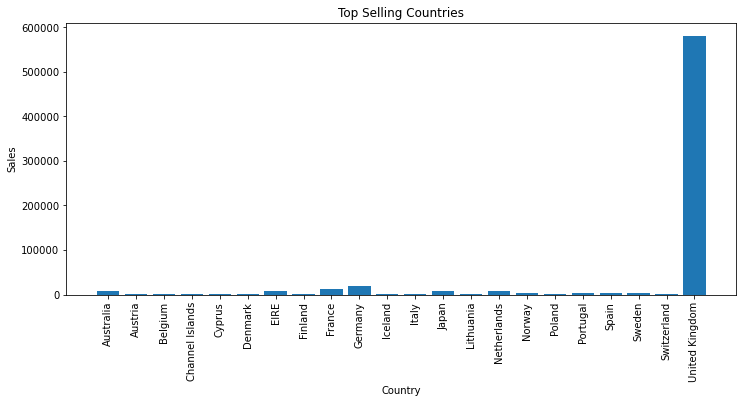

In [47]:
# Exploring how much each country sold
PR_data_v = PR_data.copy()
PR_data_v['Sales'] = PR_data_v['Quantity']*PR_data_v['UnitPrice']
PR_data_v['Sales'] = PR_data_v['Sales'].astype('int64')

top_sales_country = pd.DataFrame(data={'Country':PR_data_v['Country'],'Sales':PR_data_v['Sales']})
top_sales_country = top_sales_country.groupby('Country').sum().reset_index()

plt.figure(figsize=(12,5))
plt.bar(top_sales_country['Country'],top_sales_country['Sales'])
plt.title('Top Selling Countries')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.xticks(rotation = 'vertical');
plt.show()

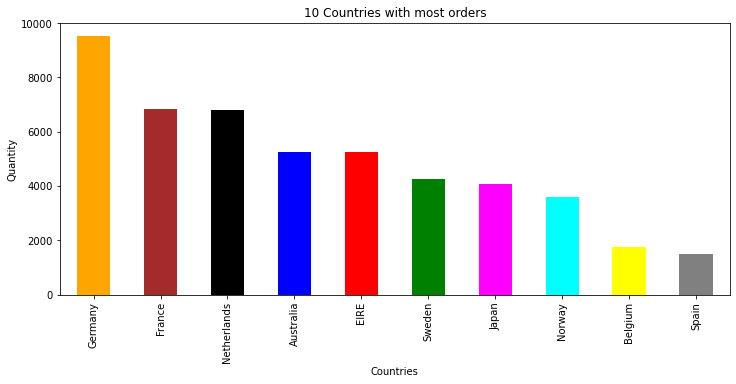

In [48]:
# A histogram with the 10 countries that have the most 'Quantity' ordered except UK

# group by the Country
countries = PR_data_v.groupby('Country').sum()

# sort the value and get the first 10 after UK
countries = countries.sort_values(by = 'Quantity',ascending = False)[1:11]

plt.figure(figsize=(12,5))

c = ['orange', 'brown', 'black', 'blue', 'red', 'green', 'magenta','cyan', 'yellow', 'grey']
countries['Quantity'].plot(kind='bar', color=c)

plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')
plt.show()

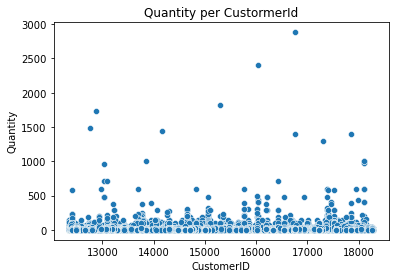

In [49]:
# Scatter plot for Quantity purchased by each Customer

sns.scatterplot(x='CustomerID', y = 'Quantity' , data = PR_data_v)

plt.title('Quantity per CustormerId')
plt.show()

<Figure size 864x360 with 0 Axes>

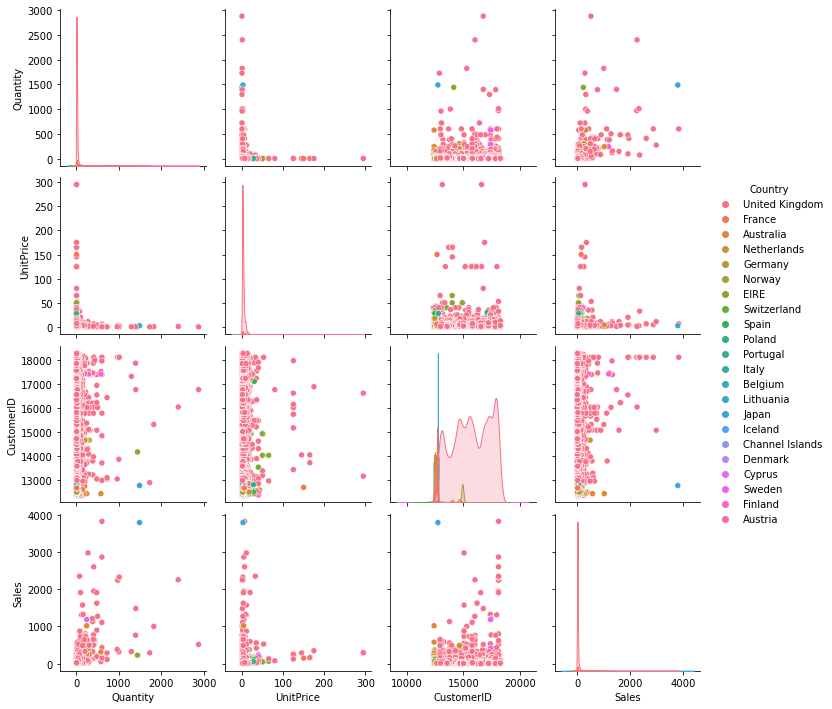

In [45]:
# Pairplot to see relationships in the data at once
plt.figure(figsize=(12,5))
sns.pairplot(PR_data_v, hue='Country')
plt.show()

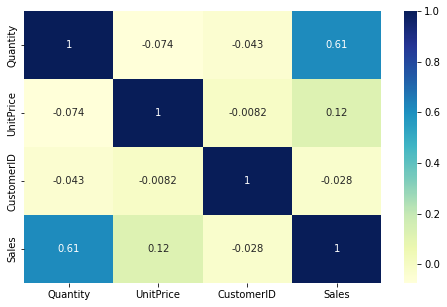

In [50]:
# A Heatmap to see Correlation amoung the variables in the dataset

fig,ax = plt.subplots(figsize=(8,5))

sns.heatmap(PR_data_v.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [51]:
# Working and splitting Dates to Plot for Time Analysis
# Adding features as year, month, month_year, day of week, hour

PR_data_v['InvoiceDate'] = pd.to_datetime(PR_data_v['InvoiceDate'])
PR_data_v

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20
...,...,...,...,...,...,...,...,...,...
49994,540541,22341,LOVE GARLAND PAINTED ZINC,12,2011-01-09 15:13:00,1.65,15799.0,United Kingdom,19
49995,540541,21332,MOROCCAN BEATEN METAL MIRROR,1,2011-01-09 15:13:00,12.75,15799.0,United Kingdom,12
49996,540541,20831,GOLD PHOTO FRAME,6,2011-01-09 15:13:00,2.10,15799.0,United Kingdom,12
49997,540541,22169,FAMILY ALBUM WHITE PICTURE FRAME,2,2011-01-09 15:13:00,8.50,15799.0,United Kingdom,17


In [52]:
PR_data_v['month'] = PR_data_v['InvoiceDate'].dt.month
PR_data_v['year'] = PR_data_v['InvoiceDate'].dt.year

In [53]:
PR_data_v['WeekDay'] = PR_data_v['InvoiceDate'].dt.day_name()

In [54]:
PR_data_v['month_year'] = pd.to_datetime(PR_data_v[['year', 'month']].assign(Day=1))

In [55]:
PR_data_v['hour'] = PR_data_v['InvoiceDate'].dt.hour

In [56]:
PR_data_v.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,month,year,WeekDay,month_year,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15,12,2010,Wednesday,2010-12-01,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20,12,2010,Wednesday,2010-12-01,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22,12,2010,Wednesday,2010-12-01,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20,12,2010,Wednesday,2010-12-01,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20,12,2010,Wednesday,2010-12-01,8


In [57]:
plot = pd.DataFrame(PR_data_v.groupby(['month_year'])['InvoiceNo'].count()).reset_index()
plot2 = pd.DataFrame(PR_data_v.groupby(['WeekDay'])['InvoiceNo'].count())

In [58]:
plot2 = plot2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()

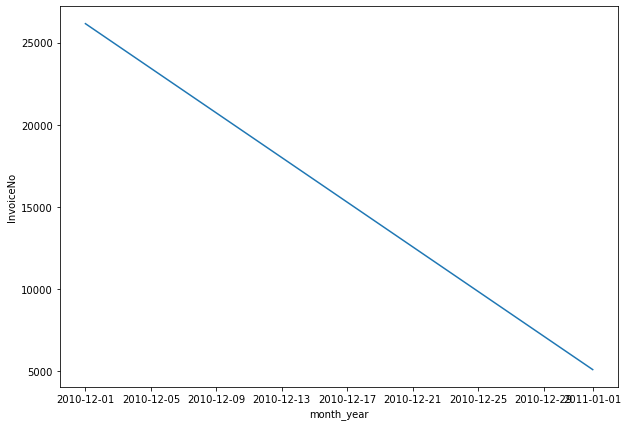

In [59]:
# Check how many orders per month?
plt.figure(figsize=(10,7))
sns.lineplot(x="month_year", y="InvoiceNo", data = plot)
plt.show()

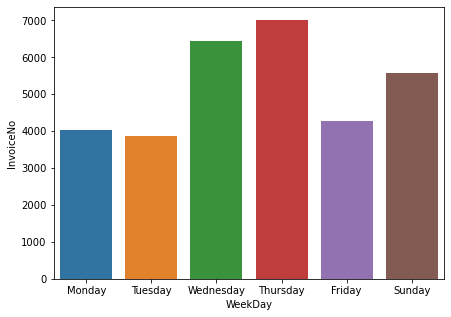

In [60]:
# Checking how many orders per day?
plt.figure(figsize=(7,5))
sns.barplot(x="WeekDay", y="InvoiceNo", data = plot2)
plt.show()

# Model

## KNN

In [83]:
# Creating the Model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [84]:
# Prediction --- Test dataset
Y_pred=knn.predict(X_test)
Y_pred

array(['22661', '84029G', '22699', ..., '21187', '22865', '85123A'],
      dtype=object)

In [85]:
# Evaluate the performance of the model

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, Y_pred)
cm

array([[ 1,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  0,  7,  0],
       [ 0,  0,  0, ...,  0,  0, 23]], dtype=int64)

In [87]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)*100

93.18072674883943

In [88]:
# another way to check the accuracy
knn.score(X_test, Y_test)*100

93.18072674883943

In [44]:
# Complete performance report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       10002       1.00      1.00      1.00         1
       10120       0.00      0.00      0.00         2
      10124A       0.00      0.00      0.00         1
       10125       1.00      1.00      1.00         2
       10133       1.00      0.75      0.86         4
       10135       0.83      1.00      0.91         5
       11001       1.00      1.00      1.00         2
       15034       1.00      1.00      1.00         1
       15036       1.00      1.00      1.00         2
      15044B       0.00      0.00      0.00         2
      15044C       0.00      0.00      0.00         1
     15056BL       1.00      1.00      1.00         8
      15056N       1.00      1.00      1.00         5
      15056P       1.00      1.00      1.00         2
      15060B       1.00      1.00      1.00         3
       16008       0.00      0.00      0.00         1
       16010       0.00      0.00      0.00         1
       16011       1.00    

C:\Users\akksh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akksh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akksh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akksh\anaconda3\lib\site-packages\sklearn\metrics\_cla

## LogisticRegression

In [89]:
# model creation---LogisticRegression ---Classification--- Target column contain Discrete values
from sklearn.linear_model import LogisticRegression
LRC = LogisticRegression() # model creation
LRC.fit(X_train, Y_train) # model fitting -- using training dataset

C:\Users\akksh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
# Prediction --- on Test dataset
Y_pred = LRC.predict(X_test)
Y_pred

array(['22661', '84029G', '22699', ..., '21187', '22865', '22946'],
      dtype=object)

In [92]:
# Evaluate the performance

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, Y_pred)
cm

array([[ 1,  0,  0, ...,  0,  0,  0],
       [ 0,  2,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  0,  7,  0],
       [ 0,  0,  0, ...,  0,  0, 23]], dtype=int64)

In [93]:
# Inbuilt method accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)*100

97.96702417160236

In [94]:
# Complete performance report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       10002       1.00      1.00      1.00         1
       10120       1.00      1.00      1.00         2
      10124A       0.00      0.00      0.00         1
       10125       1.00      1.00      1.00         2
       10133       0.00      0.00      0.00         4
       10135       0.42      1.00      0.59         5
       11001       1.00      1.00      1.00         2
       15034       1.00      1.00      1.00         1
       15036       1.00      1.00      1.00         2
      15044B       0.00      0.00      0.00         2
      15044C       1.00      1.00      1.00         1
     15056BL       1.00      1.00      1.00         8
      15056N       1.00      1.00      1.00         5
      15056P       1.00      1.00      1.00         2
      15060B       1.00      1.00      1.00         3
       16008       1.00      1.00      1.00         1
       16010       0.00      0.00      0.00         1
       16011       1.00    

C:\Users\akksh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akksh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akksh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akksh\anaconda3\lib\site-packages\sklearn\metrics\_cla

# Product Recommendation with Correlation model

In [71]:
PR_data_basket = PR_data[['InvoiceNo', 'StockCode', 'Description', 'Quantity']]
PR_data_basket.head()

,InvoiceNo,StockCode,Description,Quantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,71053,WHITE METAL LANTERN,6
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6


In [72]:
PR_data.groupby('Description').agg(
    orders=('InvoiceNo', 'nunique'),
    quantity=('Quantity', 'sum')
).sort_values(by='orders', ascending=False).head(10)

,orders,quantity
Description,,
WHITE HANGING HEART T-LIGHT HOLDER,245,4577
REGENCY CAKESTAND 3 TIER,164,1807
HAND WARMER BABUSHKA DESIGN,149,3690
SCOTTIE DOG HOT WATER BOTTLE,141,928
PAPER CHAIN KIT 50'S CHRISTMAS,132,1697
HEART OF WICKER SMALL,131,1929
CHOCOLATE HOT WATER BOTTLE,130,993
HEART OF WICKER LARGE,121,1185
JAM MAKING SET PRINTED,120,1593


In [73]:
PR_data_baskets_product = PR_data_basket.pivot_table(index='InvoiceNo', columns=['Description'], values='Quantity').fillna(0)
PR_data_baskets_product.head()

Description,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC FINISH 15CM PLANTER POTS,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
def get_recommendations(data, product):
    """Generate a set of product recommendations using item-based collaborative filtering.
    
    Args:
        data (dataframe): Pandas dataframe containing matrix of items purchased.
        product (string): Column name for target item. 
        
    Returns: 
        recommendations (dataframe): Pandas dataframe containing product recommendations. 
    """
    
    recommendations = data.corrwith(data[product])
    recommendations.dropna(inplace=True)
    recommendations = pd.DataFrame(recommendations, columns=['correlation']).reset_index()
    recommendations = recommendations.sort_values(by='correlation', ascending=False)
    
    return recommendations

In [75]:
product_recommendations = get_recommendations(PR_data_baskets_product, 'WHITE HANGING HEART T-LIGHT HOLDER')
product_recommendations.head()

,Description,correlation
2397,WHITE HANGING HEART T-LIGHT HOLDER,1.000000
989,GOLD MINI TAPE MEASURE,0.495243
622,CREAM SLICE FLANNEL PINK SPOT,0.256385
1210,LADS ONLY TISSUE BOX,0.218774
1634,PINK MARSHMALLOW SCARF KNITTING KIT,0.177879


In [76]:
product_recommendations = get_recommendations(PR_data_baskets_product, 'PARTY BUNTING')
product_recommendations.head()

,Description,correlation
1534,PARTY BUNTING,1.000000
353,BLUE TV TRAY TABLE,0.241706
2357,VINTAGE UNION JACK BUNTING,0.220760
2402,WHITE METAL LANTERN,0.209447
2029,SET/20 STRAWBERRY PAPER NAPKINS,0.200852


# Second Dataset Models


## Dataset - Amazon Electronics 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import seaborn as sns
sns.set_style('white')
%matplotlib inline

import sklearn
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel
from sklearn.metrics import mean_squared_error, pairwise
from sklearn.model_selection import train_test_split

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

from sklearn.decomposition import TruncatedSVD

In [2]:
ratings = pd.read_csv('electronics.csv')
ratings_df = ratings.copy()

In [4]:
ratings_df.columns = ['userId', 'productId', 'Rating', 'timestamp']
ratings_df

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,132793040,5,1365811200
1,A2CX7LUOHB2NDG,321732944,5,1341100800
2,A2NWSAGRHCP8N5,439886341,1,1367193600
3,A2WNBOD3WNDNKT,439886341,3,1374451200
4,A1GI0U4ZRJA8WN,439886341,1,1334707200
...,...,...,...,...
99995,A9Q7GF7UFZVFC,B00005K47X,5,1364169600
99996,A33WGUJ5IIWHLM,B00005K47X,5,1403049600
99997,A29LU2ANHQ8O78,B00005K47X,5,1353801600
99998,AHRBJ3XW7JXW6,B00005K47X,5,1356134400


In [ ]:
import seaborn as sns
sns.countplot(x='Rating',data=ratings_df) #count number of every rating graphically

### Popularity-Based Recommender 

In [6]:
total_votes = pd.DataFrame(ratings_df.groupby('productId')['Rating'].count().reset_index())
total_votes.columns = ['productId', 'vote_count']
total_votes = total_votes.merge(ratings_df, on = "productId")

mean_rating = total_votes.groupby('productId')['Rating'].mean().reset_index()
mean_rating = mean_rating.merge(total_votes, on = "productId")
mean_rating.columns = ['productId', 'avg rating', 'vote_count', 'userId', 'rating', 'timestamp']

In [7]:
mean_rating.shape

(100000, 6)

In [8]:
v = mean_rating['vote_count']
m = mean_rating['vote_count'].quantile(0.95)
R = mean_rating['avg rating']
C = mean_rating['rating'].mean()

mean_rating = mean_rating[mean_rating['vote_count'] >= m]

In [9]:
mean_rating.shape

(6314, 6)

In [10]:
recommended_products = mean_rating.drop(['userId', 'timestamp', 'rating'], axis = 1)
recommended_products.drop_duplicates(inplace = True)

In [11]:
def recommendation(x):
    v = x['vote_count']
    m = mean_rating['vote_count'].quantile(0.95)
    R = x['avg rating']
    C = mean_rating['rating'].mean()
    return (v/(v+m) * R) + (m/(m+v) * C)
recommended_products['score'] = recommended_products.apply(recommendation, axis = 1)

In [12]:
recommended_products.sort_values(by ="score", ascending = False, inplace = True)

In [13]:
recommended_products

,productId,avg rating,vote_count,score
22020,B00001P4ZH,4.456386,2075,4.356401
44711,B00004T8R2,4.280142,1692,4.277019
72028,B00004ZCJE,4.123675,2547,4.199310


### Product popularity based recommendation system targeted at new customers

In [14]:
amazon_ratings = pd.read_csv('electronics.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,user_id,product_id,ratings,time_stamp
0,AKM1MP6P0OYPR,132793040,5,1365811200
1,A2CX7LUOHB2NDG,321732944,5,1341100800
2,A2NWSAGRHCP8N5,439886341,1,1367193600
3,A2WNBOD3WNDNKT,439886341,3,1374451200
4,A1GI0U4ZRJA8WN,439886341,1,1334707200


In [15]:
amazon_ratings.shape

(100000, 4)

In [18]:
popular_products = pd.DataFrame(amazon_ratings.groupby('product_id')['ratings'].count())
most_popular = popular_products.sort_values('ratings', ascending=False)
most_popular.head(10)

,ratings
product_id,
B00004ZCJE,2547
B00001P4ZH,2075
B00004T8R2,1692
B00001WRSJ,1586
972683275,1051
B00004SABB,1030
B00005ATMB,1015
B00004SB92,1006
B00004THCZ,820


<AxesSubplot:xlabel='product_id'>

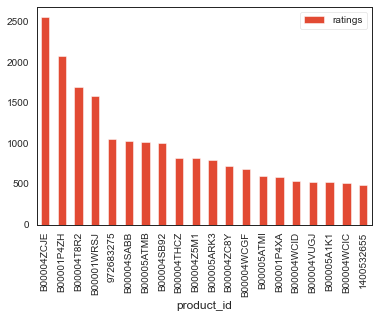

In [19]:
#Top 20 products sell by ecommerce website shown graphically
most_popular.head(20).plot(kind = "bar")

Analysis:

The above graph gives us the most popular products (arranged in descending order) sold by the business.

For eaxmple, product, ID # B00004ZCJE has sales of over 2500, the next most popular product, ID # B00001P4ZH has sales of 2000, etc.

## Collaborative Filtering 

### kNN - Nearest products in terms of ratings
Here our approach is to find the similar products by using the ratings provided by users. Not a great idea because similar rating doesn't mean products are similar!!

Also the raw data is sparse with most cells zero. Hence, the distance calculation may not provide reliable values.

Most importantly, this approach will not provide **user specific recommendations**.

In [20]:
df_ratings = ratings.copy()

In [21]:
df_ratings.columns = ['userId', 'productId', 'rating', 'timestamp']
df_ratings.drop('timestamp', axis = 1, inplace = True)

In [23]:
df_ratings = df_ratings.head(10000)

In [24]:
products_matrix = df_ratings.pivot_table(index = "productId", columns = "userId", values = "rating").fillna(0)

In [25]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = "brute")
products_sparse = csr_matrix(products_matrix.values)
model_knn.fit(products_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [27]:
def get_recommendations(prod_id):
    distances, indices = model_knn.kneighbors(products_matrix.loc[prod_id].values.reshape(1, -1), n_neighbors = 6)
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for {0}:\n'.format(products_matrix.index[i]))
        else:
            print('{0}: {1}, with distance of {2}:'.format(i, products_matrix.index[indices.flatten()[i]], distances.flatten()[i]))

In [28]:
get_recommendations('B00000J1EP')

Recommendations for 059400232X:

1: B000001OKZ, with distance of 0.9449518117436819:
2: B000001OKH, with distance of 0.9572426828066856:
3: B00000J1F3, with distance of 0.9770632548932008:
4: B000001OL6, with distance of 0.9810685352283465:
5: B00000J1EQ, with distance of 0.9875148173617918:


### Correlation Matrix Model

In [29]:
amazon_ratings = pd.read_csv('electronics.csv')
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.columns = ['userId', 'productId', 'Rating', 'timestamp']
amazon_ratings.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,132793040,5,1365811200
1,A2CX7LUOHB2NDG,321732944,5,1341100800
2,A2NWSAGRHCP8N5,439886341,1,1367193600
3,A2WNBOD3WNDNKT,439886341,3,1374451200
4,A1GI0U4ZRJA8WN,439886341,1,1334707200


In [30]:
amazon_ratings.shape

(100000, 4)

In [31]:
# Subset of Amazon Ratings

amazon_ratings1 = amazon_ratings.head(10000)

In [32]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)
ratings_utility_matrix.head()

productId,059400232X,089933623X,094339676X,1034385789,1039869017,1085901386,1094441252,1182702627,1254875778,132793040,...,B00000J1DN,B00000J1DT,B00000J1E6,B00000J1EC,B00000J1EJ,B00000J1EP,B00000J1EQ,B00000J1ES,B00000J1EZ,B00000J1F3
userId,,,,,,,,,,,,,,,,,,,,,
A00766851QZZUBOVF4JFT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01255851ZO1U93P8RKGE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0402564TCEO67AUZFJO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
ratings_utility_matrix.shape

(9826, 1305)

In [34]:
X = ratings_utility_matrix.T #Transposing the matrix
X.head()

userId,A00766851QZZUBOVF4JFT,A01255851ZO1U93P8RKGE,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0402564TCEO67AUZFJO,A04256643L1ZMT75HVD2P,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A07865442XT0VEAVPSGX1,...,AZV9WA9MNT0FB,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXFQVG0PS3V1,AZYNQZ94U6VDB,AZYTSU42BZ7TP,AZZ77XYX8O2WE,AZZGUU97OHUF1,AZZMV5VT9W7Y8
productId,,,,,,,,,,,,,,,,,,,,,
059400232X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
089933623X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
094339676X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1034385789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1039869017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X.shape

(1305, 9826)

In [36]:
X1 = X #Unique products in subset of data

In [37]:
SVD = TruncatedSVD(n_components=10)   ## Decomposing the Matrix
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

In [38]:
correlation_matrix = np.corrcoef(decomposed_matrix) # Correlation Matrix
correlation_matrix.shape

### Isolating Product ID # 4293001999 from the Correlation Matrix


In [39]:
X.index[99]

'4293001999'

In [40]:
i = "4293001999"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [42]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

### Recommending top 10 highly correlated products in sequence

In [44]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

### Collaborative Filtering - Surprise


In [7]:
column_names=['userId','productId','rating','timestamp']
df=pd.read_csv('electronics.csv')
df.columns=column_names

In [8]:
from surprise import SVD, Reader, Dataset 
svd = SVD()

In [9]:
reader = Reader()

In [10]:
data = Dataset.load_from_df(df[['userId', 'productId', 'rating']], reader)

In [11]:
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2909  1.2770  1.2883  1.2770  1.2702  1.2807  0.0077  
MAE (testset)     1.0154  1.0019  1.0114  1.0039  0.9989  1.0063  0.0062  
Fit time          6.02    5.51    5.68    6.05    5.66    5.78    0.21    
Test time         0.20    0.12    0.12    0.17    0.35    0.19    0.08    


{'test_rmse': array([1.29089995, 1.27703293, 1.28831783, 1.27700367, 1.27021569]),
 'test_mae': array([1.01541648, 1.00194758, 1.01139073, 1.0038546 , 0.99886116]),
 'fit_time': (6.015899896621704,
  5.513291120529175,
  5.679180145263672,
  6.049854516983032,
  5.662858247756958),
 'test_time': (0.20189499855041504,
  0.1156620979309082,
  0.12456536293029785,
  0.16954946517944336,
  0.34511542320251465)}

We get a mean Root Mean Sqaure Error of 1.28 approx which is good enough for our case. Let us now train on our dataset and arrive at predictions.

In [12]:
trainset = data.build_full_trainset()

We train the algorithm on the trainset.

In [13]:
svd.fit(trainset)

Let us pick the user with userId of 'A17HMM1M7T9PJ1' and check the ratings she/he has given so far to different products.

In [14]:
df[df['userId'] == 'A17HMM1M7T9PJ1'].sort_values(by='rating', ascending=False)

,userId,productId,rating,timestamp
178,A17HMM1M7T9PJ1,970407998,4,1281744000
49793,A17HMM1M7T9PJ1,B00004THDE,4,1212537600
86482,A17HMM1M7T9PJ1,B000058BCQ,4,1200182400


As an example, we use the algorithm to predict the score that might be given to the productId of 'B005UEB5TQ' by this specific userId.

In [20]:
svd.predict(uid='A17HMM1M7T9PJ1', iid='B005UEB5TQ', r_ui=None)

Prediction(uid='A17HMM1M7T9PJ1', iid='B005UEB5TQ', r_ui=None, est=4.013914917792038, details={'was_impossible': False})

In [21]:
svd.predict(uid='A17HMM1M7T9PJ1', iid='B005UEB5TQ', r_ui=None).est

4.013914917792038

Our model predicts that userId of 'A17HMM1M7T9PJ1' will give 4.01 as the rating for productId of '0970407998'.

In [22]:
items = df['productId'].unique()
test = [['A17HMM1M7T9PJ1', iid, 4] for iid in items]
predictions = svd.test(test)
pred = pd.DataFrame(predictions)

In [23]:
pred = pred.sort_values(by='est', ascending=False)
pred.head(10)

,uid,iid,r_ui,est,details
5130,A17HMM1M7T9PJ1,B00004ZCJE,4,4.965129,{'was_impossible': False}
6014,A17HMM1M7T9PJ1,B000053HC5,4,4.959313,{'was_impossible': False}
1625,A17HMM1M7T9PJ1,B00000JBUI,4,4.947973,{'was_impossible': False}
1594,A17HMM1M7T9PJ1,B00000JBHE,4,4.926860,{'was_impossible': False}
6017,A17HMM1M7T9PJ1,B000053HH5,4,4.901835,{'was_impossible': False}
5410,A17HMM1M7T9PJ1,B000050LUE,4,4.888811,{'was_impossible': False}
5576,A17HMM1M7T9PJ1,B00005115S,4,4.852375,{'was_impossible': False}
4202,A17HMM1M7T9PJ1,B00004X10B,4,4.837249,{'was_impossible': False}
5783,A17HMM1M7T9PJ1,B0000513O4,4,4.827341,{'was_impossible': False}
5586,A17HMM1M7T9PJ1,B00005119M,4,4.791463,{'was_impossible': False}
